<a href="https://colab.research.google.com/github/AeMcRa/Datascience-things/blob/main/AedaRamoU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-bvanlu86
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-bvanlu86
  Resolved https://github.com/pydata/xarray.git to commit c25215299c02cd36781cf3aa38e8583d1fe14849
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Predicting Positive Review Percentage For Games On Steam

Steam is one of the largest computer game marketplaces, and since I make video games, it is useful to have information on how various components impact public perception and sales.

Since a lot of data on sales is proprietary, I only have a few factors to go off of, those being avg playtime, median playtime, price, and estimated owners(catagorical). Note that this is data from 2019, and is likely outdated. Smaller, low-mid priced games have seen a meteoric rise as of late, and this is likely not reflected in the data here.

Immediately, we run into an issue of scale. Very small games have very few reviews, which creates irregular bumps in the data. As such, I cleaned the data of all of the games with less than 10 reviews. This will skew the data towards higher performing games, but since a game having few reviews is indicative of that game not catching on even if it's reviews are rated highly, I think this is fine.



In [ ]:
steam = pd.read_csv('https://raw.githubusercontent.com/AeMcRa/Datascience-things/refs/heads/main/steam3.csv')

In [ ]:
steam = steam.query('(positive_ratings+negative_ratings) > 10.0')

(array([ 10.,   1.,   0.,   0.,   4.,   2.,   4.,  17.,   6.,   2.,   3.,
         10.,  10.,  19.,  15.,  20.,  24.,  14.,  25.,  15.,  34.,  31.,
         27.,  35.,  23.,  56.,  46.,  69.,  52.,  35.,  56.,  64.,  40.,
        103.,  72.,  73.,  99.,  83., 118.,  70., 115., 118., 116., 107.,
        113., 162., 162., 141., 137.,  77., 268., 141., 164., 197., 211.,
        175., 194., 217., 245., 162., 248., 280., 256., 273., 290., 253.,
        387., 245., 375., 380., 325., 319., 408., 386., 289., 432., 423.,
        368., 419., 322., 520., 517., 402., 469., 462., 503., 450., 434.,
        521., 406., 533., 468., 513., 480., 458., 400., 343., 207., 114.,
        537.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

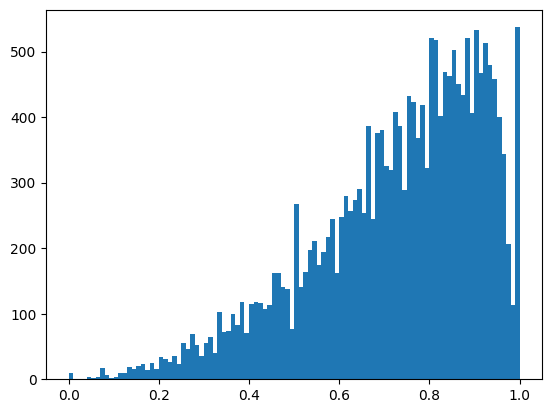

In [ ]:
plt.hist(steam.pos_percentage,bins = 100)

In [ ]:
#steam = steam.query('pos_percentage >0')
steam = steam.query('pos_percentage <1')
steam.shape

(19506, 19)

In [ ]:
steam.dropna()
steam.shape

(19506, 19)

In [ ]:
# # mlb stands for multiple linear bikes
# with pm.Model() as model_steamp:

#     #priors on the linear part of the model
#     α = pm.Normal("α", mu=0, sigma=1)
#     β0 = pm.Normal("β0", mu=0, sigma=10)
#     β1 = pm.Normal("β1", mu=0, sigma=10)
#     β2 = pm.Normal("β2", mu=0, sigma=10)

#     #linear part of the model
#     μ = pm.Deterministic("μ", α + β0 * steam.price + β1 * steam.positive_ratings + β2 * steam.negative_ratings)

#     #prior for the standard deviation
#     σ = pm.HalfNormal("σ", 10)

#     #likelihood
#     y = pm.Weibull("y", alpha=μ, beta=σ, observed=steam.pos_percentage)

#     #we need the log likelihood for model comparison later
#     idata_mlb = pm.sample(idata_kwargs={"log_likelihood":True})

In [ ]:
# pm.sample_posterior_predictive(idata_mlb, model = model_steamp, extend_inferencedata=True)

In [ ]:
# az.plot_ppc(idata_mlb, num_pp_samples=200, colors=["C1", "C0", "C1"])

In [ ]:
# model_steam_b = bmb.Model("pos_percentage ~  average_playtime + median_playtime + price",steam, family = "weibull")

In [ ]:
# model_steam_b

In [ ]:
# idata_steam_b = model_steam_b.fit()

In [ ]:
#  bmb.interpret.plot_predictions(model_steam_b,
#                               idata_steam_b,
#                              ["price",  "owners"], fig_kwargs={"figsize":(11, 4)})

# Model selection
Lets take a look at how these variables may impact the positive reveiw percentage and each other.

Price will impact the number of positive reviews, as higher priced games typically are of higher quality and thus more likely to be reveiwed positively(or negatively if the game is bad but is just riding off the coat tails of a franchise. This is more prevalent on consoles but still somewhat relevant here). Price will also impact the playtime, as people are likely to be more willing to slog through a game they have spent more money on.

Average and median playtime obviously impact each other as they are based on the same variable. The two of them impact positive reviews as people that play a game a lot are more likely to both review it and to review it positively.

The number of people who own a game is also massively important and has an impact on all of the catagories. More owners skews average and median playtime. Higher priced games typically come from big name developers who draw huge audiences. Games spread in popularity becasue people enjoy and reccomend them/think they look cool, so more owners is conducive to more popularity and likely higher reviews.

All of these variables seem to be useful in determining percentage of positive reviews, so I will use them all, and try models with different interactions/hierarchies with the owners variable.

In [ ]:
model_steam = bmb.Model("pos_percentage ~  average_playtime + median_playtime+ owners + price", data=steam)

In [ ]:
model_steam

       Formula: pos_percentage ~  average_playtime + median_playtime+ owners + price
        Family: gaussian
          Link: mu = identity
  Observations: 19506
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 0.721, sigma: 0.7018)
            average_playtime ~ Normal(mu: 0.0, sigma: 0.0002)
            median_playtime ~ Normal(mu: 0.0, sigma: 0.0002)
            owners ~ Normal(mu: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sigma: [ 1.8261  3.8887 14.3018
                65.5054  1.2971  1.8996  4.7386 37.8215  1.6673
              2.9309  9.6694 46.3205])
            price ~ Normal(mu: 0.0, sigma: 0.0611)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 0.1876)

In [ ]:
idata_steam = model_steam.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


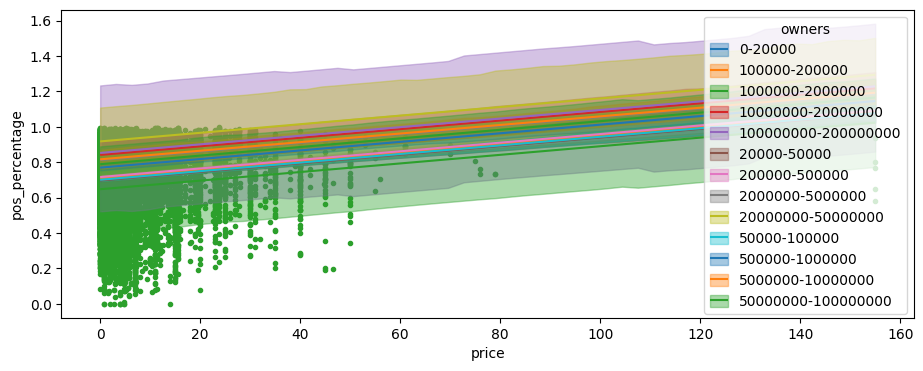

In [ ]:
bmb.interpret.plot_predictions(model_steam,
                               idata_steam,
                                ["price",  "owners"], fig_kwargs={"figsize":(11, 4)})
plt.plot(steam.price, steam.pos_percentage, "C2.", zorder=-3)

In [ ]:
model_steam_h = bmb.Model("pos_percentage ~  average_playtime + median_playtime + (price|owners)", data=steam)

In [ ]:
model_steam_h

       Formula: pos_percentage ~  average_playtime + median_playtime + (price|owners)
        Family: gaussian
          Link: mu = identity
  Observations: 19506
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 0.721, sigma: 0.4724)
            average_playtime ~ Normal(mu: 0.0, sigma: 0.0002)
            median_playtime ~ Normal(mu: 0.0, sigma: 0.0002)
        
        Group-level effects
            1|owners ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 0.4724))
            price|owners ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 0.0611))
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 0.1876)

In [ ]:
idata_steam_h = model_steam_h.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 31 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


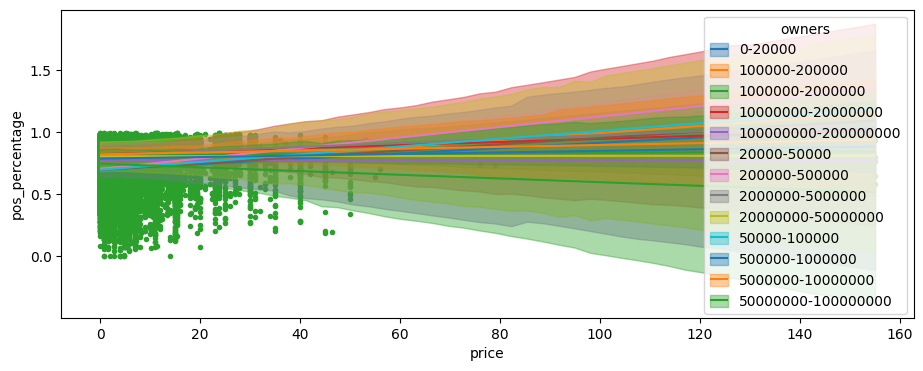

In [ ]:
bmb.interpret.plot_predictions(model_steam_h,
                               idata_steam_h,
                                ["price",  "owners"], fig_kwargs={"figsize":(11, 4)})
plt.plot(steam.price, steam.pos_percentage, "C2.", zorder=-3)

In [ ]:
# cmp_bmb = az.compare( {"Catagorical":idata_steam,"Heirarchical":idata_steam_h} )
# cmp_bmb

In [ ]:
model_steam_pti = bmb.Model("pos_percentage ~  average_playtime + median_playtime:owners + price", data=steam)

In [ ]:
model_steam_pti

       Formula: pos_percentage ~  average_playtime + median_playtime:owners + price
        Family: gaussian
          Link: mu = identity
  Observations: 19506
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 0.721, sigma: 0.6239)
            average_playtime ~ Normal(mu: 0.0, sigma: 0.0002)
            median_playtime:owners ~ Normal(mu: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sigma: [0.0016
                0.0003 0.002  0.0098 0.0818 0.0005 0.0003 0.0056 0.0775 0.0003
             0.0013 0.0078 0.0047])
            price ~ Normal(mu: 0.0, sigma: 0.0611)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 0.1876)

In [ ]:
idata_steam_pti = model_steam_pti.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


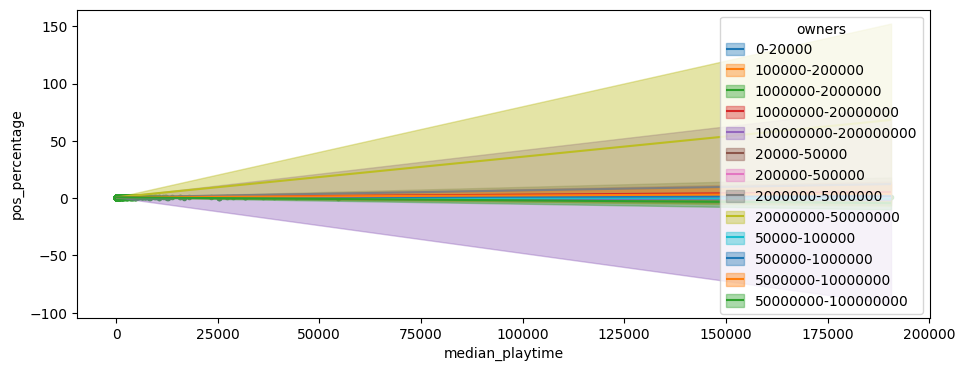

In [ ]:
bmb.interpret.plot_predictions(model_steam_pti,
                               idata_steam_pti,
                                ["median_playtime",  "owners"], fig_kwargs={"figsize":(11, 4)})
plt.plot(steam.median_playtime, steam.pos_percentage, "C2.", zorder=-3)

In [ ]:
model_steam_pth = bmb.Model("pos_percentage ~  average_playtime + (median_playtime|owners) + price", data=steam)

In [ ]:
model_steam_pth

       Formula: pos_percentage ~  average_playtime + (median_playtime|owners) + price
        Family: gaussian
          Link: mu = identity
  Observations: 19506
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 0.721, sigma: 0.6211)
            average_playtime ~ Normal(mu: 0.0, sigma: 0.0002)
            price ~ Normal(mu: 0.0, sigma: 0.0611)
        
        Group-level effects
            1|owners ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 0.6211))
            median_playtime|owners ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 0.0002))
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 0.1876)

In [ ]:
idata_steam_pth = model_steam_pth.fit(idata_kwargs={"log_likelihood":True})

Sampling chain 1, 0 divergences ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  18% 0:36:58 / 0:03:44

ERROR:pymc.stats.convergence:There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


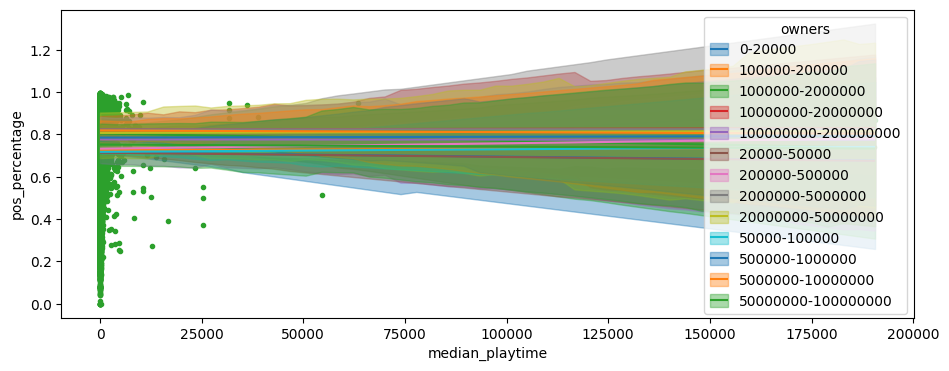

In [ ]:
bmb.interpret.plot_predictions(model_steam_pth,
                               idata_steam_pth,
                                ["median_playtime",  "owners"], fig_kwargs={"figsize":(11, 4)})
plt.plot(steam.median_playtime, steam.pos_percentage, "C2.", zorder=-3)

# Analysis
Due to the unexpectadly massive disparity in median playtime between games, the data is quite hard to read. The heirarchical models seem to give us a good representation of how the different catagories show the scale of reviews, so those will probably be the best. Lets run a comparison to see which is best.

In [ ]:
cmp_bmb = az.compare( {"Interactionpt":idata_steam_pti,"Heirarchicalpt":idata_steam_pth,"CatagoricalPrice":idata_steam,"HeirarchicalPrice":idata_steam_h} )
cmp_bmb

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.67 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
HeirarchicalPrice,0,5205.539853,16.155507,0.000000,0.946488,104.789792,0.000000,False,log
Heirarchicalpt,1,5196.779495,11.671583,8.760358,0.053512,104.809301,4.389772,True,log
CatagoricalPrice,2,5195.732998,13.144015,9.806855,0.000000,104.745952,4.677795,True,log
Interactionpt,3,5098.373213,17.459604,107.166641,0.000000,105.045958,11.776127,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

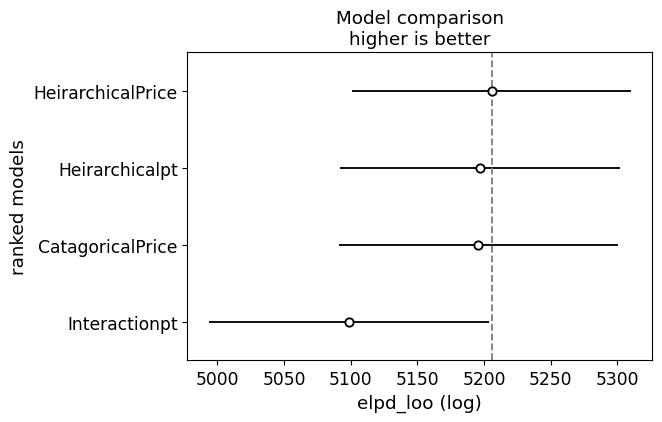

In [ ]:
az.plot_compare(cmp_bmb)

# Cool
Indeed, the heirarchical models seem to work the best, though all of the models are quite similar in how good they are.

Lets finish this by looking at how all of the model's predicitions compare to the data

<Axes: xlabel='pos_percentage'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


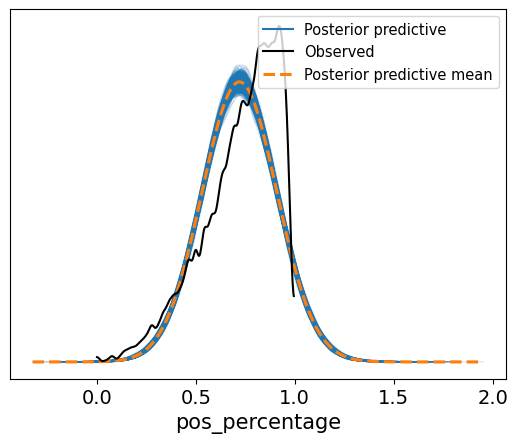

In [ ]:
model_steam_pti.predict(idata_steam_pti,kind = "response")
az.plot_ppc(idata_steam_pti)

<Axes: xlabel='pos_percentage'>

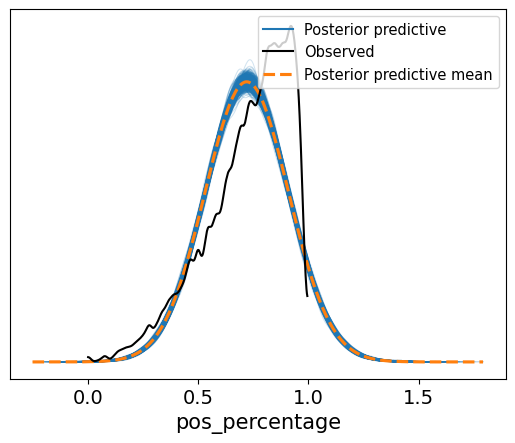

In [ ]:
model_steam_pth.predict(idata_steam_pth,kind = "response")
az.plot_ppc(idata_steam_pth)

<Axes: xlabel='pos_percentage'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


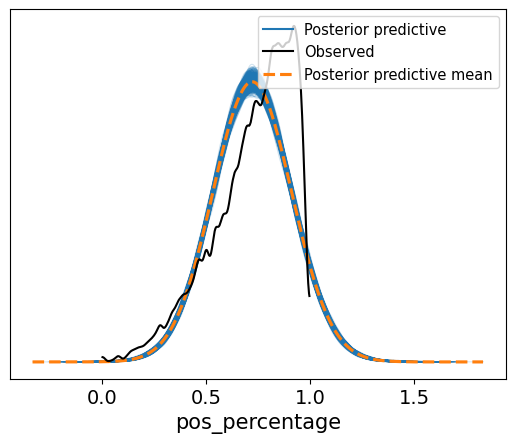

In [ ]:
model_steam.predict(idata_steam,kind = "response")
az.plot_ppc(idata_steam)

<Axes: xlabel='pos_percentage'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


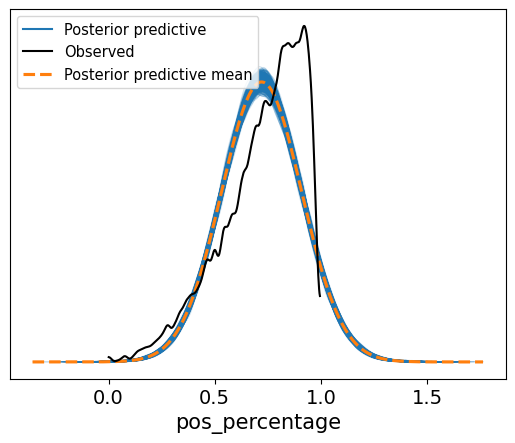

In [ ]:
model_steam_h.predict(idata_steam_h,kind = "response")
az.plot_ppc(idata_steam_h)

# Final conclusions

Its alright. Nothing especially good but it sorta gives the gist of it. People tend to review games highly, which makes sense cause people play games to have fun, and if they have fun then they will probably review it highly. If a game doesn't look fun, people will not play it and generally people don't review things they dont play. Bad games will thus have fewew reviews, and will be more likely to have been removed from the dataset earlier.

Ideally, I would have been able to use a model with skew to account for the skew present, but unfortunately none of them worked.